# E Commerce Application

### Background: 
This portfolio aims to analyze and discover product information matter to E commerce business.

This project is divided into 2 parts. The first part I will explore the first dataset to idenify the brand that matter most. For examples, 1. the substitute items, 2. instances of people purchasing more expensive substitute, 3. the brands that people care about, 4. Who are these people, 5. When and why do these brands matter?


we want to focus on Adhesives & Sealants, a category of products that are not well-codified. Because of this, it is more open to intrepretation.

In [2]:
# import libraries
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
# helper function
def plot_feature(df, col):
    plt.figure(figsize = (14, 6))
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        df[col] = df[col].astype('category')
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.title('Distribution of'+ " "+ col)
    plt.show()

# Discover the Data

In [5]:
# import dataset
product = pd.read_table('dataset/Transactions with A&S.txt',skiprows =1,names= ('order_num','l1','l2','l3','productid','brand'))
product = product[(product['l1']=='Adhesives, Sealants and Tape')]


In [6]:
product.head()

,order_num,l1,l2,l3,productid,brand
0,1182478,"Adhesives, Sealants and Tape",Putties,Putties,122821,2180
1,63908,"Adhesives, Sealants and Tape",Caulks,Caulks and Sealants,276172,1054
2,1165840,"Adhesives, Sealants and Tape",Concrete and Asphalt,Concrete Cleaners and Sealers,110119,4326
4,1088891,"Adhesives, Sealants and Tape",Glues and Cements,Retaining Compounds,251285,2515
5,883665,"Adhesives, Sealants and Tape",Tapes,Anti-Slip Tapes,8040,934


In [7]:
product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691328 entries, 0 to 3387278
Data columns (total 6 columns):
order_num    691328 non-null int64
l1           691328 non-null object
l2           691328 non-null object
l3           691328 non-null object
productid    691328 non-null int64
brand        691328 non-null int64
dtypes: int64(3), object(3)
memory usage: 36.9+ MB


In [8]:
product.isnull().any()

order_num    False
l1           False
l2           False
l3           False
productid    False
brand        False
dtype: bool

In [9]:
product.describe(include=['O'])

,l1,l2,l3
count,691328,691328,691328
unique,1,9,51
top,"Adhesives, Sealants and Tape",Tapes,Electrical Tapes
freq,691328,331739,113119


In [10]:
product.describe(include=[np.number])

,order_num,productid,brand
count,6.913280e+05,691328.000000,691328.000000
mean,8.294248e+05,152496.403364,2294.912212
std,4.082508e+05,97657.935304,1408.010418
min,1.000000e+01,89.000000,2.000000
25%,8.277620e+05,71735.000000,1054.000000
50%,9.901800e+05,124838.000000,2515.000000
75%,1.109932e+06,261519.000000,3706.000000
max,1.238617e+06,333076.000000,4825.000000


In [11]:
product.shape

(691328, 6)

In [12]:
product.productid.nunique() 

6185

In [13]:
product.brand.nunique() 

226

In [14]:
product.order_num.nunique()

479917

In [15]:
product.columns

Index(['order_num', 'l1', 'l2', 'l3', 'productid', 'brand'], dtype='object')

In [16]:
cat_var = ['l1','l2','l3']
num_var = ['productid','brand']

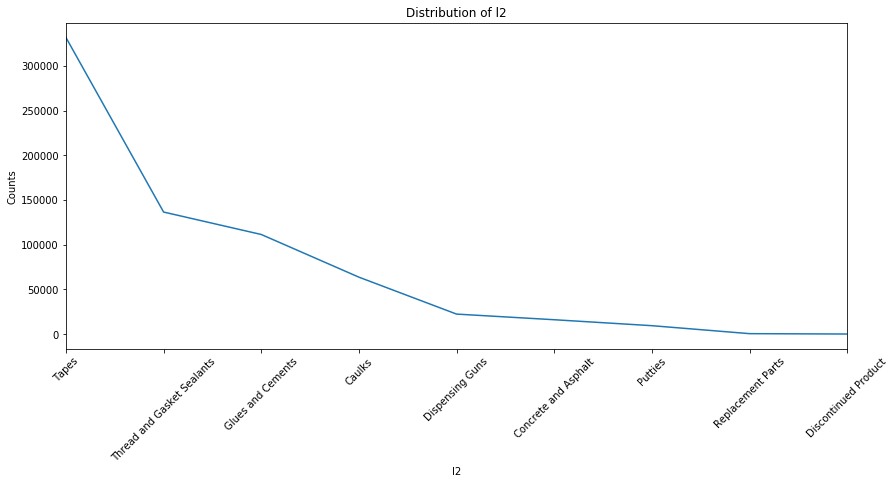

In [18]:
plot_feature(product,'l2')

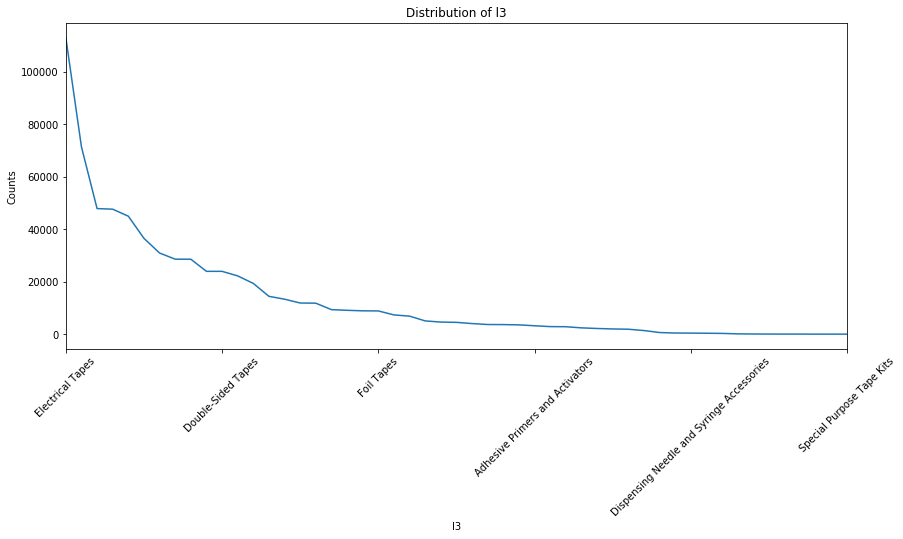

In [19]:
plot_feature(product,'l3')

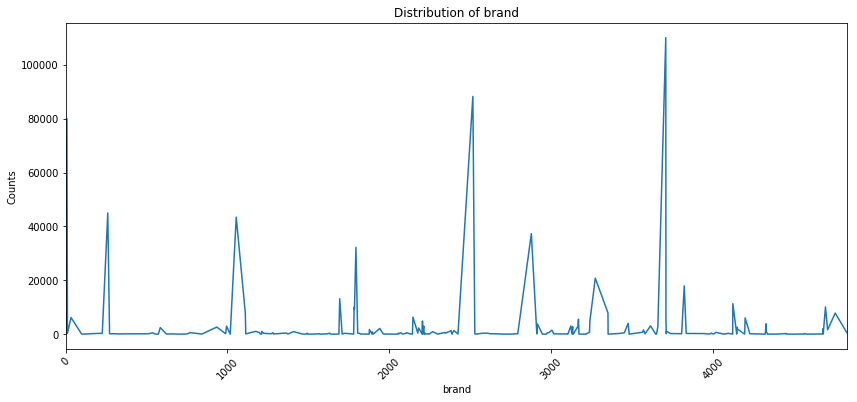

In [20]:
plot_feature(product,'brand')

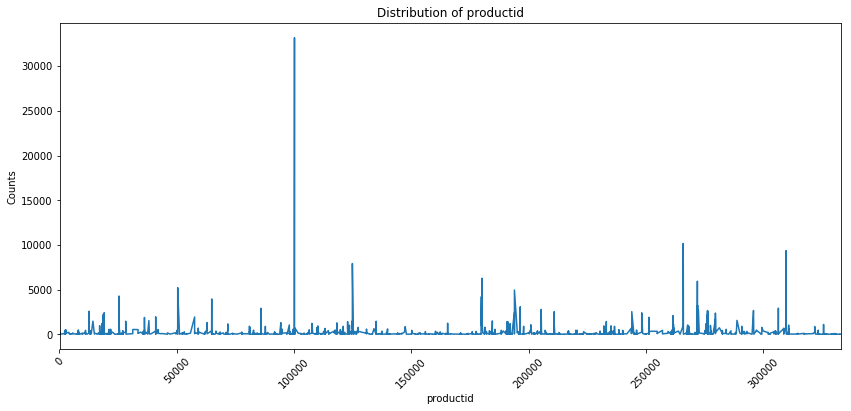

In [21]:
plot_feature(product,'productid')

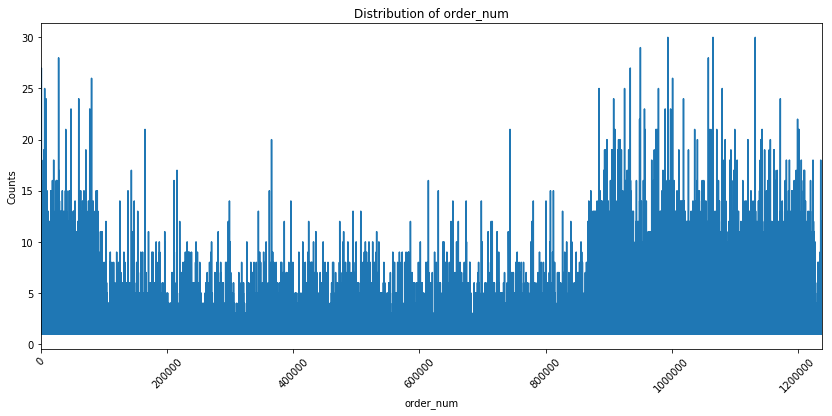

In [22]:
plot_feature(product,'order_num')

In [23]:
# Find the top 5 most popular brand 
product['brand'].value_counts().sort_values(ascending=False).head(5)

3706    110095
2515     88261
9        80093
261      45008
1054     43425
Name: brand, dtype: int64

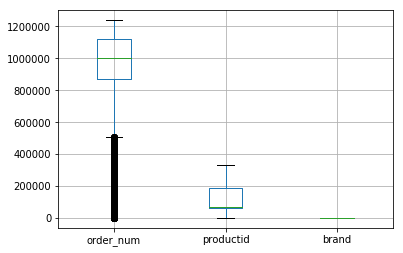

In [24]:
product[(product['brand']==1793)].boxplot()

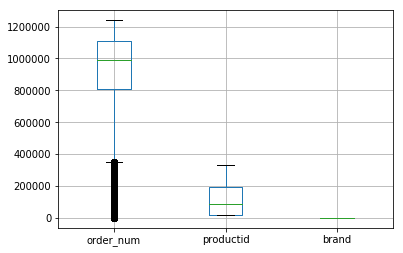

In [25]:
product[(product['brand']==9)].boxplot()

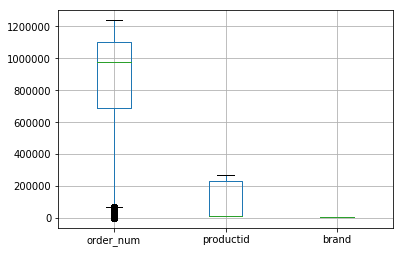

In [26]:
product[(product['brand']==4692)].boxplot()

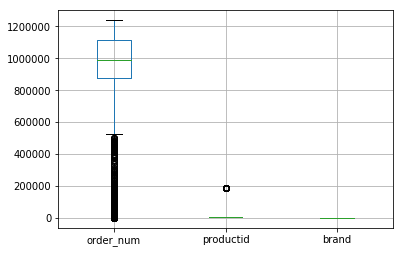

In [27]:
product[(product['brand']==934)].boxplot()

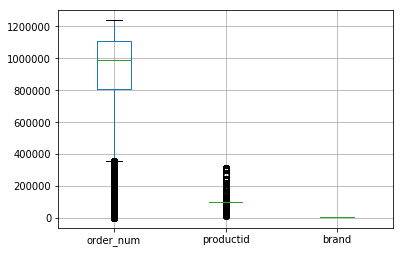

In [28]:
product[(product['brand']==3706)].boxplot()

In [29]:
# Find the productId with the highest count
product['productid'].value_counts().sort_values(ascending=False).head(1)

100164    33186
Name: productid, dtype: int64

### Insights
#### After plotting the data and looking at distribution of different columns, it appears that brand 1793 is the most popular brand, following 9,4692,934,3706
#### On the other hand, electrical Tapes in the Adhesives, Sealants and Tape group is the most popular product, which are all belong to the 3706 brand, the fifth most popular brand.

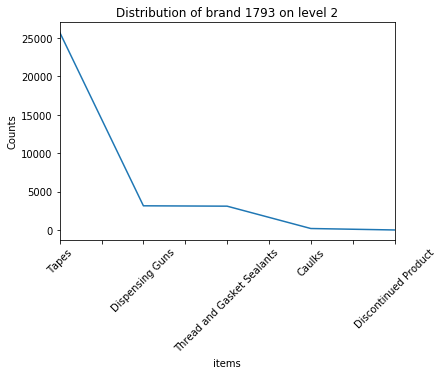

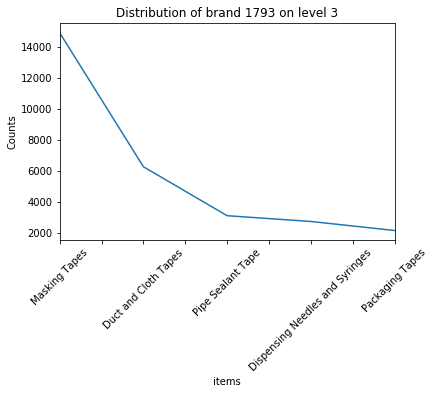

In [33]:
# These are the top 5 most popular items based on brand 1793, the most popular brand

lv2_1793 =product[(product['brand']==1793)]['l2'].value_counts().head(5).plot()
plt.xticks(rotation=45)
plt.xlabel('items')
plt.ylabel('Counts')
plt.title('Distribution of brand 1793 on level 2')
plt.show()

lv3_1793 =product[(product['brand']==1793)]['l3'].value_counts().head(5).plot()
plt.xticks(rotation=45)
plt.xlabel('items')
plt.ylabel('Counts')
plt.title('Distribution of brand 1793 on level 3')
plt.show()


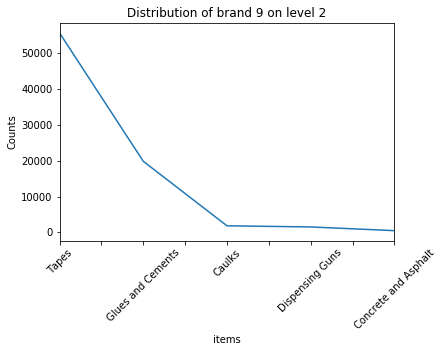

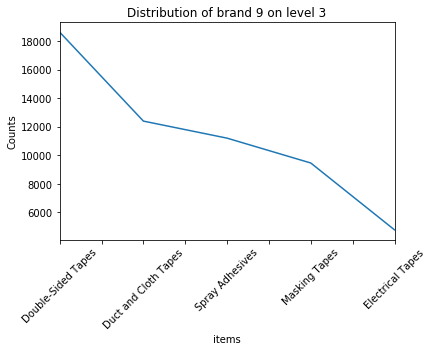

In [34]:
# These are the top 5 most popular items based on brand 9, the most popular brand.


lv2_1793 =product[(product['brand']==9)]['l2'].value_counts().head(5).plot()
plt.xticks(rotation=45)
plt.xlabel('items')
plt.ylabel('Counts')
plt.title('Distribution of brand 9 on level 2')
plt.show()

lv3_1793 =product[(product['brand']==9)]['l3'].value_counts().head(5).plot()
plt.xticks(rotation=45)
plt.xlabel('items')
plt.ylabel('Counts')
plt.title('Distribution of brand 9 on level 3')
plt.show()

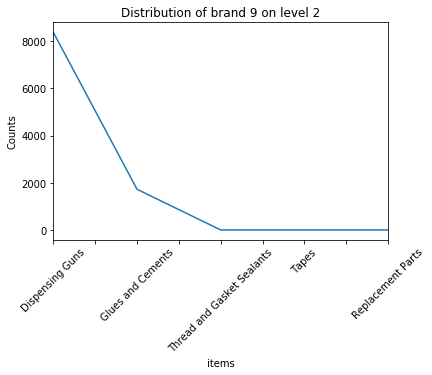

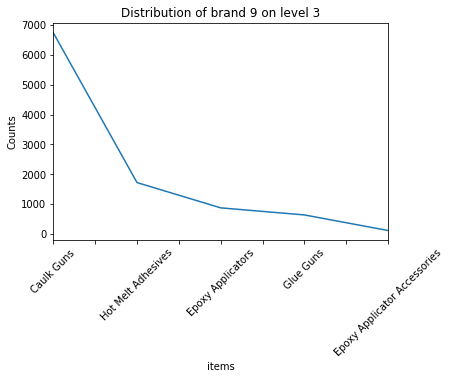

In [35]:
# These are the top 5 most popular items based on brand 4692, the most popular brand.

lv2_1793 =product[(product['brand']==4692)]['l2'].value_counts().head(5).plot()
plt.xticks(rotation=45)
plt.xlabel('items')
plt.ylabel('Counts')
plt.title('Distribution of brand 9 on level 2')
plt.show()

lv3_1793 =product[(product['brand']==4692)]['l3'].value_counts().head(5).plot()
plt.xticks(rotation=45)
plt.xlabel('items')
plt.ylabel('Counts')
plt.title('Distribution of brand 9 on level 3')
plt.show()